In [2]:
# Notebook to compare the model spectras to the data
import numpy as np
import matplotlib.pyplot as plt
from   astropy.io import fits
import astropy.units as u

In [81]:
# read in the Voronoi-binned spectra fits file
binSpec = fits.open("../data/gistTutorial/results/jeso-47509200-157160-50-021320_0317208900B/jeso-47509200-157160-50-021320_VorSpectra.fits")
binSpec.info()
AllSpec = fits.open("../data/gistTutorial/results/jeso-47509200-157160-50-021320_0317208900B/jeso-47509200-157160-50-021320_AllSpectra.fits")
AllSpec.info()
table = fits.open("../data/gistTutorial/results/jeso-47509200-157160-50-021320_0317208900B/jeso-47509200-157160-50-021320_table.fits")
table.info()




Filename: ../data/gistTutorial/results/jeso-47509200-157160-50-021320_0317208900B/jeso-47509200-157160-50-021320_VorSpectra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  VOR_SPECTRA    1 BinTableHDU     24   85R x 2C   [3447D, 3447D]   
  2  LOGLAM        1 BinTableHDU     22   3447R x 1C   [D]   
Filename: ../data/gistTutorial/results/jeso-47509200-157160-50-021320_0317208900B/jeso-47509200-157160-50-021320_AllSpectra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  SPECTRA       1 BinTableHDU     24   2500R x 2C   [3447D, 3447D]   
  2  LOGLAM        1 BinTableHDU     22   3447R x 1C   [D]   
Filename: ../data/gistTutorial/results/jeso-47509200-157160-50-021320_0317208900B/jeso-47509200-157160-50-021320_table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  TABLE

In [80]:
# get wavelength array
wavelength = np.exp(binSpec[2].data.LOGLAM)





(1227, 0, -27.60000000000022, -26.60000000000021, 4383.02490234375, 98.0890884399414, -27.50000000000022, -26.500000000000213, 192.47064208984375, 4)
(array([3351.2512207 , 3241.33007812, 3159.66308594, ..., 5071.99755859,
       5070.05664062, 5075.65429688]), array([3660.75927734, 3413.20166016, 3226.17358398, ..., 4689.23925781,
       4671.71875   , 4349.63623047]))


In [16]:
# define the spectra and the spectral variance
spec = binSpec[1].data.SPEC
varSpec = np.sqrt(binSpec[1].data.ESPEC)


In [17]:
# define the spectra and spectral variance for the central bin
spec0 = spec[0]
varSpec0 = varSpec[0]
print(spec0)
print(varSpec0[0:10])

[13608.46069336 13459.16333008 13354.57397461 ... 20188.93994141
 20159.56201172 20039.18603516]
[10.79073217 10.77276246 10.78324421 10.94738099 10.9363865  10.86597848
 10.66778484 10.65965579 10.63037842 10.58602611]


In [18]:
# read in the ppxf model best fit fits file
ppxf = fits.open("../data/gistTutorial/results/jeso-47509200-157160-50-021320_0317208900B/jeso-47509200-157160-50-021320_ppxf-bestfit.fits")

In [19]:
# define the bestfit spectra for the central bin
ppxfSpec0 = ppxf[1].data.BESTFIT[0,:]

In [20]:
# define the spectra +/- the error
especP = spec0 + varSpec0
especM = spec0 - varSpec0


In [87]:
# get the spectra from a spaxel in the central bin
# step 1: find which spaxels are in bin 0:
for i in range(2500):
    if table[1].data[i][1] == 0:
        print(i, table[1].data[i][1])
        
spaxSpec = AllSpec[1].data[1227][0]

1227 0
1228 0
1277 0
1278 0
(3447,)


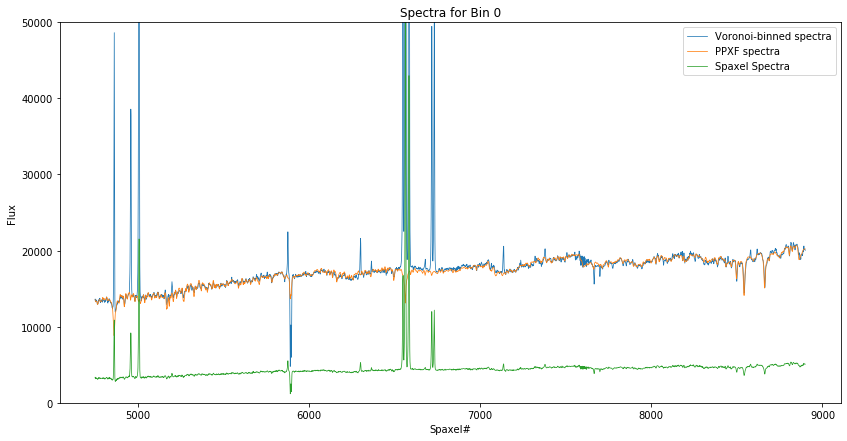

In [92]:
plt.figure(figsize=(14,7))
plt.title("Spectra for Bin 0")
plt.xlabel("Spaxel#")
plt.ylabel("Flux")
plt.plot(wavelength,spec0,linewidth=.75,label="Voronoi-binned spectra")
plt.plot(wavelength[0:3446],ppxfSpec0,linewidth=.75,label="PPXF spectra")
plt.plot(wavelength, spaxSpec, linewidth=.75, label="Spaxel Spectra")
plt.legend()
#plt.xlim(500,1000)
plt.ylim(0,50000)
plt.show()


In [115]:
def chisquared(x,m):
    # inputs:
    #     x: the array of observed data
    #     m: the array of the model
    #     **** x and m must be the same length
    
    # returns:
    #    the chi-squared value
    top = np.zeros_like(m)

    i = 0
    for i in range(len(x)-1):
        top[i] = (x[i]-m[i])**2
    top = x**2
    chisquared = np.sum((top[0:3446]/m)) - 2
    return chisquared

In [116]:
chi0 = chisquared(spec0,ppxfSpec0)

In [117]:
print(chi0)

84998318.64470962
